In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

**Load Train and Test Dataset**

In [3]:
train_data = pd.read_csv('/content/SalaryData_Test(1).csv')
test_data=pd.read_csv('/content/SalaryData_Train(1).csv')

In [ ]:
train_data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
test_data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**EDA**

In [ ]:
print(train_data.shape)
print(test_data.shape)

(15060, 14)
(30161, 14)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


**Data Visualization**

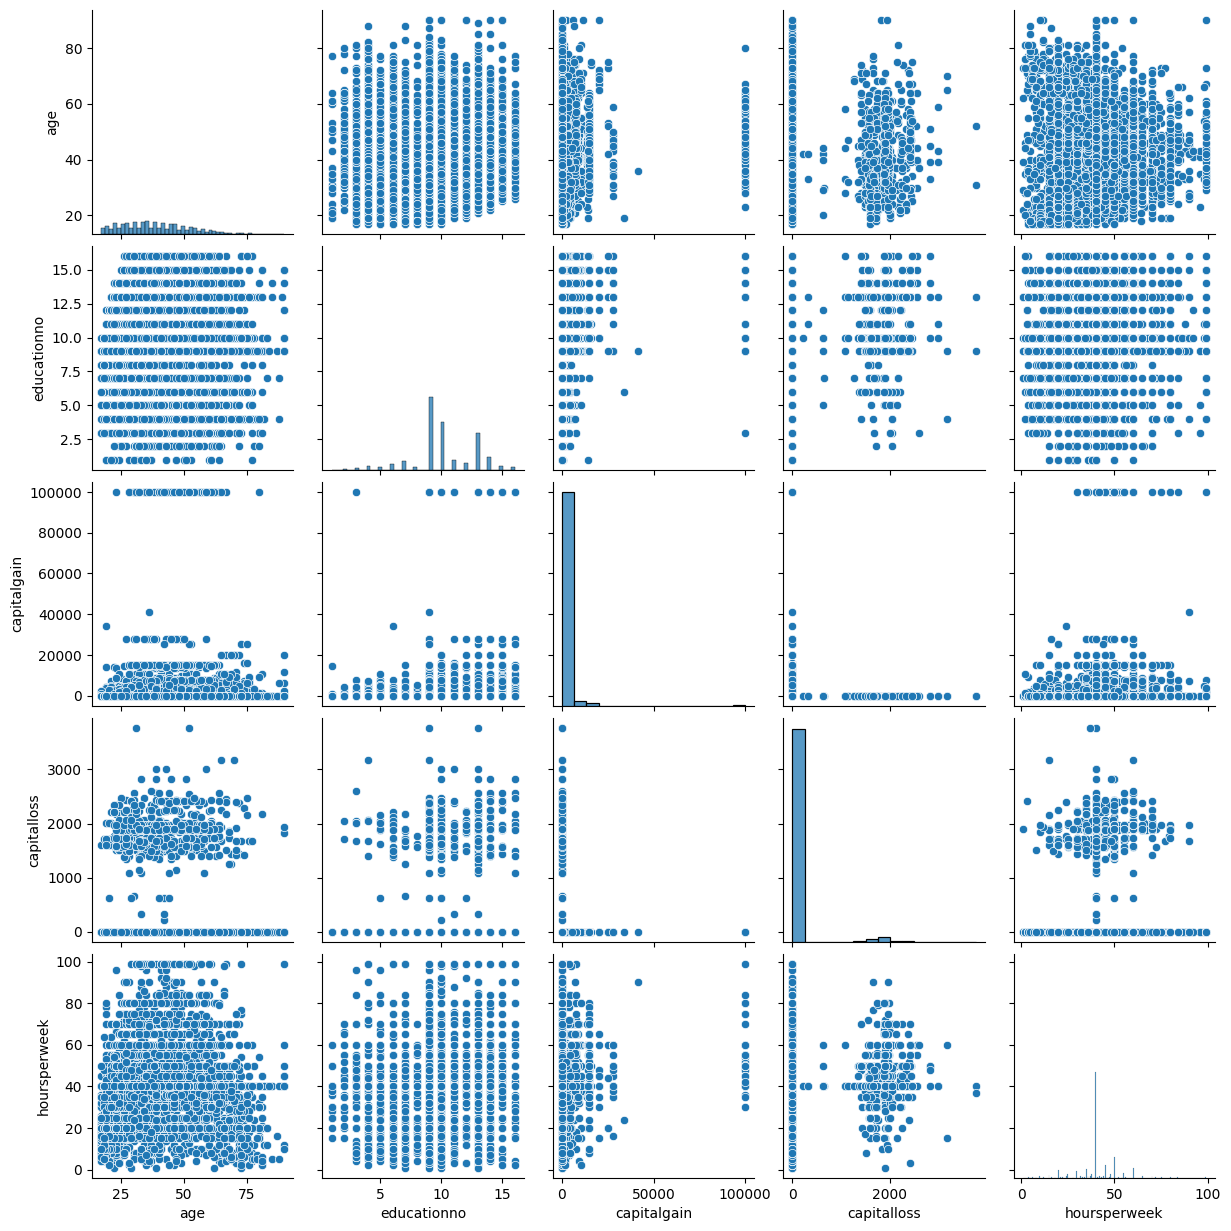

In [ ]:
sns.pairplot(train_data)
plt.show()

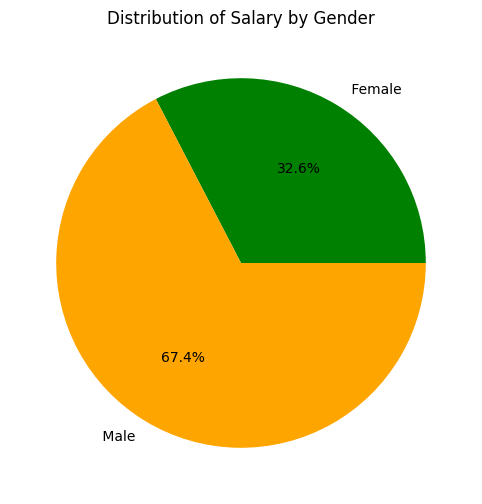

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6)
ct = pd.crosstab(train_data['Salary'], train_data['sex'])
ct.mean().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Distribution of Salary by Gender')
plt.show()

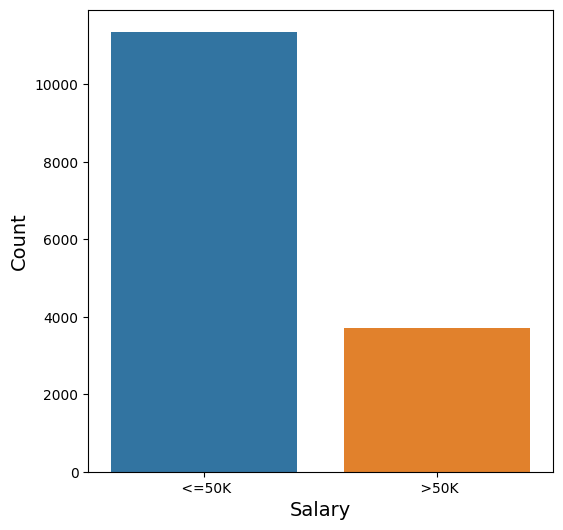

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
sns.countplot(x='Salary', data= train_data)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

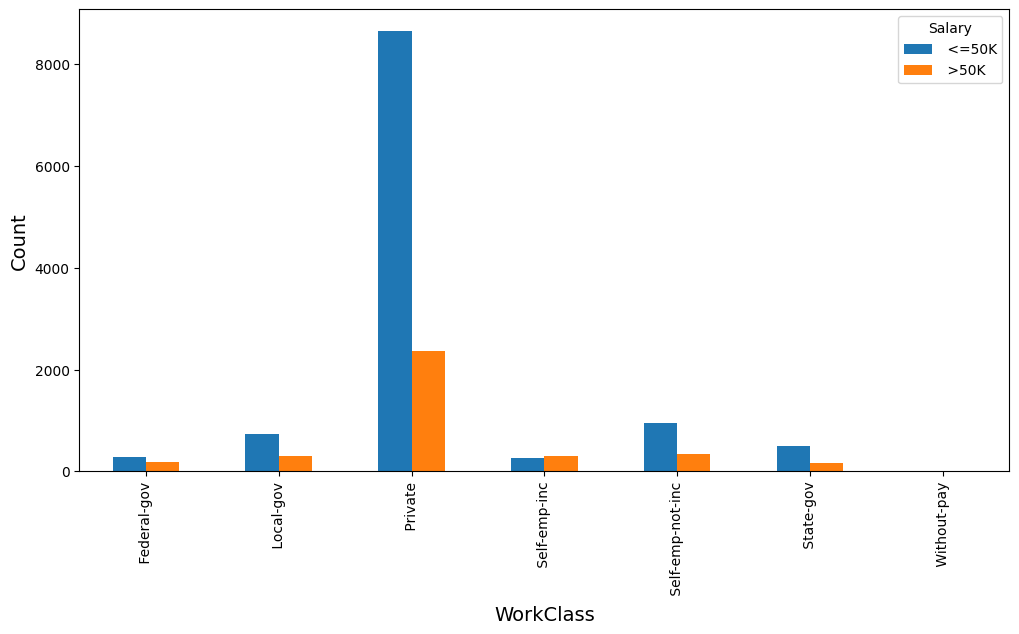

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train_data.workclass,train_data.Salary).plot(kind="bar")
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)

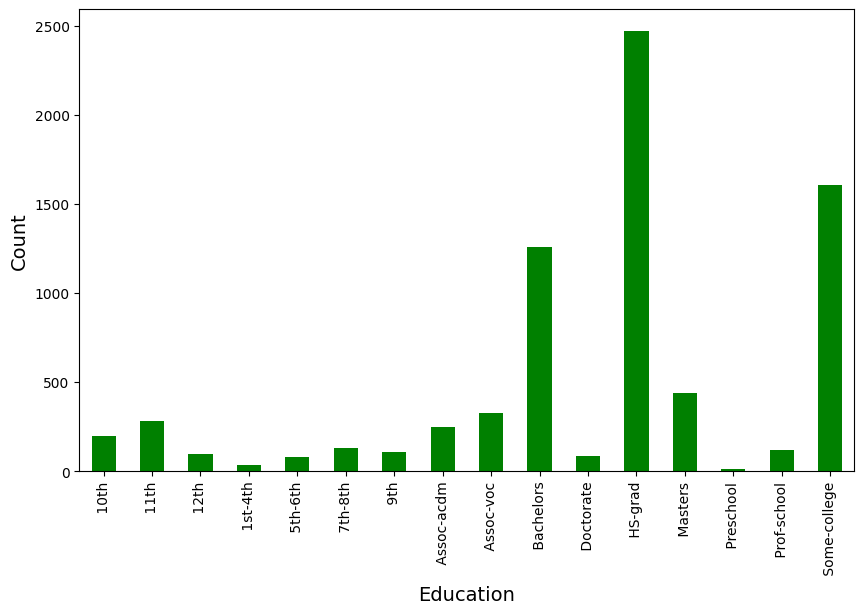

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
colors=['green']
pd.crosstab(train_data['Salary'],train_data['education']).mean().plot(kind='bar',color=colors)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

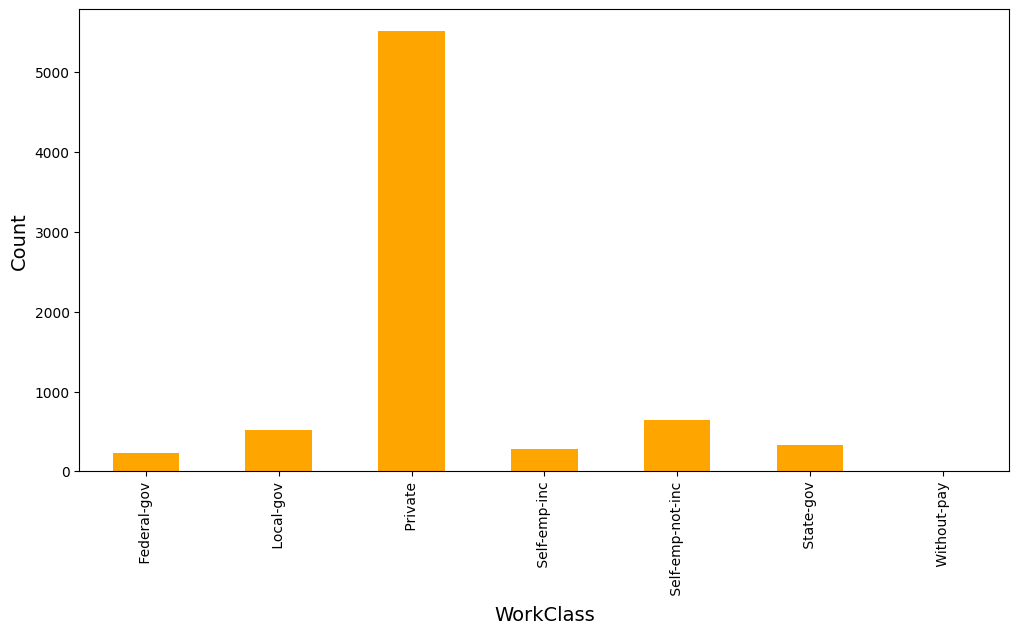

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
colors=['orange']
pd.crosstab(train_data['Salary'],train_data['workclass']).mean().plot(kind='bar',color=colors)
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

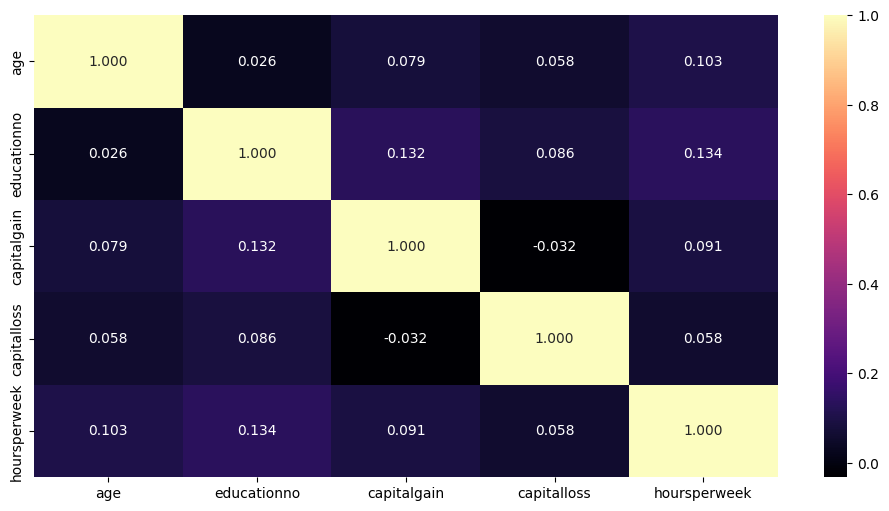

In [ ]:
import seaborn as sns
corr = train_data.corr()
sns.heatmap(corr,cmap='magma',annot=True,fmt=".3f")
plt.show()

**Data Preprocessing**

In [ ]:
le=LabelEncoder()
train_data['workclass']=le.fit_transform(train_data['workclass'])
train_data['education']=le.fit_transform(train_data['education'])
train_data['maritalstatus']=le.fit_transform(train_data['maritalstatus'])
train_data['occupation']=le.fit_transform(train_data['occupation'])
train_data['relationship']=le.fit_transform(train_data['relationship'])
train_data['race']=le.fit_transform(train_data['race'])
train_data['sex']=le.fit_transform(train_data['sex'])
train_data['native']=le.fit_transform(train_data['native'])
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [ ]:
train_data['Salary']=[0 if i.strip()=='<=50K' else 1 for i in train_data['Salary']]

In [ ]:
test_data['workclass']=le.fit_transform(test_data['workclass'])
test_data['education']=le.fit_transform(test_data['education'])
test_data['maritalstatus']=le.fit_transform(test_data['maritalstatus'])
test_data['occupation']=le.fit_transform(test_data['occupation'])
test_data['relationship']=le.fit_transform(test_data['relationship'])
test_data['race']=le.fit_transform(test_data['race'])
test_data['sex']=le.fit_transform(test_data['sex'])
test_data['native']=le.fit_transform(test_data['native'])
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [ ]:
test_data['Salary']=[0 if i.strip()=='<=50K' else 1 for i in test_data['Salary']]

**Model Building**

In [ ]:
X_train = train_data.drop(['Salary'],axis=1)
y_train = train_data[['Salary']]

X_test = test_data.drop(['Salary'],axis=1)
y_test = test_data[['Salary']]

In [ ]:
print('X_train Shape :', X_train.shape)
print('y_train Shape :', y_train.shape)
print('X_test Shape  :', X_test.shape)
print('y_test Shape  :', y_test.shape)

X_train Shape : (15060, 13)
y_train Shape : (15060, 1)
X_test Shape  : (30161, 13)
y_test Shape  : (30161, 1)


**Model Training | Testing | Evaluation - SVM Model**

In [ ]:
%%time
svc = SVC()
svc.fit(X_train, y_train)

CPU times: user 6.54 s, sys: 136 ms, total: 6.68 s
Wall time: 6.74 s


SVC()

In [ ]:
%%time
y_pred = svc.predict(X_test)

CPU times: user 12.6 s, sys: 493 µs, total: 12.6 s
Wall time: 13.4 s


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[21950   703]
 [ 5449  2059]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     22653
           1       0.75      0.27      0.40      7508

    accuracy                           0.80     30161
   macro avg       0.77      0.62      0.64     30161
weighted avg       0.79      0.80      0.76     30161



In [ ]:
svc.score(X_train, y_train)

0.7964143426294821

In [ ]:
svc.score(X_test, y_test)

0.7960279831570571

**Feature Selection**

In [ ]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 3598.475014
Feature 1: 0.769442
Feature 2: 157.089960
Feature 3: 1047.675362
Feature 4: 479.966405
Feature 5: 86.801719
Feature 6: 1810.615766
Feature 7: 13.419551
Feature 8: 224.708384
Feature 9: 38915517.544113
Feature 10: 594799.835051
Feature 11: 2652.934188
Feature 12: 2.901152


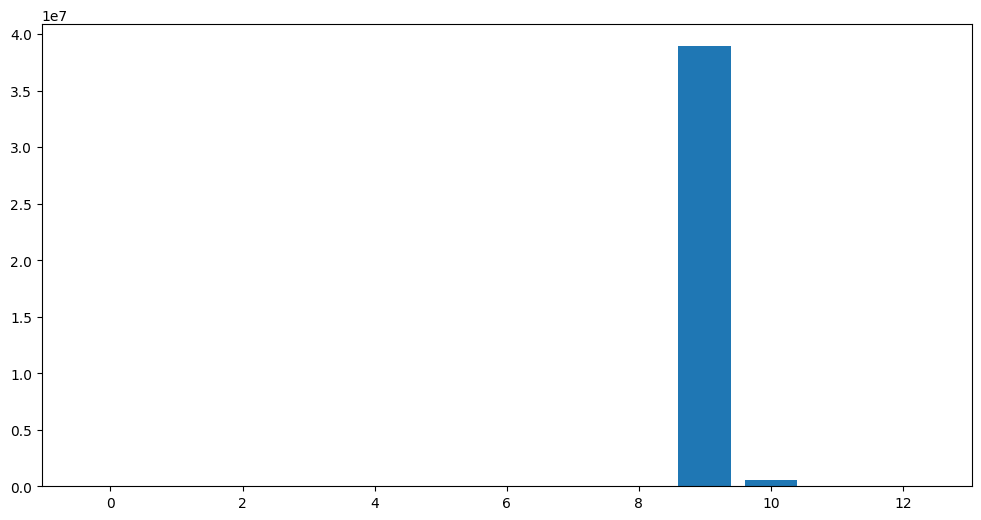

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Features 1,2,5,7,8,12 are not highly relevant

In [ ]:
train_data_copy = train_data.copy()
train_data_copy.drop(train_data_copy.columns[[1,2,5,7,8,12]],axis=1,inplace=True)
train_data_copy


,age,educationno,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,4,3,0,0,40,0
1,38,9,2,0,0,0,50,0
2,28,12,2,0,0,0,40,1
3,44,10,2,0,7688,0,40,1
4,34,6,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,3,0,0,40,0
15056,39,13,0,1,0,0,36,0
15057,38,13,2,0,0,0,50,0
15058,44,13,0,3,5455,0,40,0


In [ ]:
X_train = train_data_copy.drop(['Salary'],axis=1)
y_train = train_data_copy[['Salary']]

In [ ]:
X_test = test_data_copy.drop(['Salary'],axis=1)
y_test = test_data_copy[['Salary']]

**Model Training with Highly Relevant Features**

0.0001 < gamma < 10

0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)

C parameter adds a penalty for each misclassified data point

In [ ]:
%%time
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(X_train,y_train)

CPU times: user 10.3 s, sys: 163 ms, total: 10.4 s
Wall time: 10.5 s


SVC(C=3.0, gamma=0.01, random_state=10)

In [ ]:
%%time
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(X_test,y_test)

CPU times: user 43 s, sys: 177 ms, total: 43.2 s
Wall time: 49.9 s


SVC(C=3.0, gamma=0.01, random_state=10)

In [ ]:
%%time
y_pred=svc.predict(X_test)

CPU times: user 22.2 s, sys: 4.65 ms, total: 22.2 s
Wall time: 22.3 s


In [ ]:
print(confusion_matrix(y_test,y_pred))


[[21829   824]
 [ 3350  4158]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22653
           1       0.83      0.55      0.67      7508

    accuracy                           0.86     30161
   macro avg       0.85      0.76      0.79     30161
weighted avg       0.86      0.86      0.85     30161



In [ ]:
svc.score(X_train,y_train)

0.8580345285524569

In [ ]:
svc.score(X_test,y_test)

0.8616093630847783

SVC Score is 86.16 % ,when we drop some coloumn